# Avaliação dos resultados da Rede Neural (Parte 2)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%run functions.py

## Importação dos Dados

In [7]:
images = pd.read_csv("imageMNIST.csv", header=None, decimal=',')
labels = np.array(pd.read_csv("labelMNIST.csv", header=None))
X, zero_cols = zero_col(images)
y = np.asarray(labels)

## Treino, validação e teste

In [8]:
n_exemplos = X.shape[0]
exemplos_treino = np.array([], dtype=int)
exemplos_validacao = np.array([], dtype=int)
exemplos_teste = np.array([], dtype=int)
for i in range(10):
    aux = np.random.permutation(np.arange((n_exemplos * i / 10), (n_exemplos * (i + 1)/10), dtype=int))
    exemplos_treino = np.append(exemplos_treino, aux[:int(0.6 * n_exemplos / 10)])
    exemplos_validacao = np.append(exemplos_validacao, aux[int(0.6 * n_exemplos / 10):int(0.8 * n_exemplos / 10)])
    exemplos_teste = np.append(exemplos_teste, aux[int(0.8 * n_exemplos / 10):])
    
X_treino = X[exemplos_treino]
X_validacao = X[exemplos_validacao]
X_teste = X[exemplos_teste]
y_treino = y[exemplos_treino]
y_validacao = y[exemplos_validacao]
y_teste = y[exemplos_teste]

### Primeiro treinamento (Conjunto de treino)

In [9]:
input_layer_size = X_treino.shape[1]
hidden_layer_size = np.array([25])
num_labels = len(np.unique(y_treino))
Lambda = 0.03
alpha = 0.8
nbr_iter = 800
conj = False
theta_treino, J_history_treino = backpropagation(X_treino, y_treino, num_labels, hidden_layer_size, Lambda, alpha, nbr_iter, regularizada=True)

In [10]:
print('Resultados a partir do primeiro treinamento:\n')
pred_treino = prediction(X_treino,theta_treino)
print('O valor da função de custo para o conjunto de treino é {:.4f}.\nO algoritmo classificou corretamente {:.2f}% das imagens do conjunto de treino.\n'.format(J_history_treino[-1], (np.sum(pred_treino == y_treino)/len(y_treino)*100)))

custo_validacao = computeCost(theta_treino, X_validacao, y_validacao, input_layer_size, hidden_layer_size, num_labels, Lambda, conj, regularizada=True)[0]
pred_validacao = prediction(X_validacao, theta_treino)
print('O valor da função de custo para o conjunto de validação é {:.4f}.\nO algoritmo classificou corretamente {:.2f}% das imagens do conjunto de validação.\n'.format(custo_validacao, (np.sum(pred_validacao == y_validacao)/len(y_validacao)*100)))

custo_teste = computeCost(theta_treino, X_teste, y_teste, input_layer_size, hidden_layer_size, num_labels, Lambda,conj, regularizada=True)[0]
pred_teste = prediction(X_teste, theta_treino)
print('O valor da função de custo para o conjunto de teste é {:.4f}.\nO algoritmo classificou corretamente {:.2f}% das imagens do conjunto de teste.'.format(custo_teste, (np.sum(pred_teste == y_teste)/len(y_teste)*100)))

Resultados a partir do primeiro treinamento:

O valor da função de custo para o conjunto de treino é 0.4003.
O algoritmo classificou corretamente 94.93% das imagens do conjunto de treino.

O valor da função de custo para o conjunto de validação é 0.5817.
O algoritmo classificou corretamente 91.90% das imagens do conjunto de validação.

O valor da função de custo para o conjunto de teste é 0.5385.
O algoritmo classificou corretamente 91.20% das imagens do conjunto de teste.


### Segundo treinamento (conjuntos de treino e validação)

In [11]:
X_treino2 = np.append(X_treino, X_validacao, axis=0)
y_treino2 = np.append(y_treino, y_validacao, axis=0)
input_layer_size = X_treino2.shape[1]
hidden_layer_size = np.array([25])
num_labels = len(np.unique(y_treino2))
Lambda = 0.03
alpha = 0.8
nbr_iter = 800
conj = False
theta_treino2, J_history_treino2 = backpropagation(X_treino2, y_treino2, num_labels, hidden_layer_size, Lambda, alpha, nbr_iter, regularizada=True)

In [13]:
print('Resultados a partir do segundo treinamento:\n')
pred_treino2 = prediction(X_treino2,theta_treino2)
print('O valor da função de custo para os conjuntos de treino e validação combinados é {:.4f}.\nO algoritmo classificou corretamente {:.2f}% das imagens desses conjuntos.\n'.format(J_history_treino2[-1], (np.sum(pred_treino2 == y_treino2)/len(y_treino2)*100)))

custo_teste = computeCost(theta_treino2, X_teste, y_teste, input_layer_size, hidden_layer_size, num_labels, Lambda, conj, regularizada=True)[0]
pred_teste = prediction(X_teste, theta_treino2)
print('O valor da função de custo para o conjunto de teste é {:.4f}.\nO algoritmo classificou corretamente {:.2f}% das imagens do conjunto de teste.'.format(custo_teste, (np.sum(pred_teste == y_teste)/len(y_teste)*100)))

Resultados a partir do segundo treinamento:

O valor da função de custo para os conjuntos de treino e validação combinados é 0.4289.
O algoritmo classificou corretamente 94.55% das imagens desses conjuntos.

O valor da função de custo para o conjunto de teste é 0.5314.
O algoritmo classificou corretamente 91.80% das imagens do conjunto de teste.


## Curvas de aprendizado

In [15]:
numero_exemplos = np.arange(10, X_treino.shape[0] /10 + 10, 10, dtype=int)
J_treino = []
J_validacao = []

input_layer_size = X_treino.shape[1]
hidden_layer_size = np.array([25])
num_labels = len(np.unique(y_treino))
Lambda = 0.03
alpha = 0.8
nbr_iter = 800
conj = False
for n in numero_exemplos:
    ex = np.array([], dtype=int)
    for i in range(10):
        ex = np.append(ex, np.arange(X_treino.shape[0] * i / 10, X_treino.shape[0] * i / 10 + n, dtype=int))
    X_treinamento = X_treino[ex]
    y_treinamento = y_treino[ex]

    theta_treinamento, J_history_treinamento = backpropagation(X_treinamento, y_treinamento, num_labels, hidden_layer_size, Lambda, alpha, nbr_iter, regularizada=True)
    J_treino.append(J_history_treinamento[-1])
    J_validacao.append(computeCost(theta_treinamento, X_validacao, y_validacao, input_layer_size, hidden_layer_size, num_labels, Lambda, conj, regularizada=True)[0])

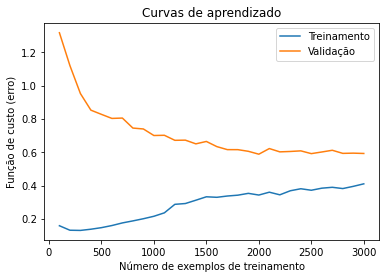

In [16]:
plt.plot(numero_exemplos*10, J_treino, label='Treinamento')
plt.plot(numero_exemplos*10, J_validacao, label='Validação')
plt.legend(loc=0)
plt.xlabel('Número de exemplos de treinamento')
plt.ylabel('Função de custo (erro)')
plt.title('Curvas de aprendizado')
plt.show()

## Escolhendo o $\lambda$

In [17]:
lambda_list = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1., 3., 10.]
theta_list = []
erro_list = []

input_layer_size = X_treino.shape[1]
hidden_layer_size = np.array([25])
num_labels = len(np.unique(y_treino))
alpha = 0.8
nbr_iter = 10
conj = False
for Lambda in lambda_list:
    theta = backpropagation(X_treino, y_treino, num_labels, hidden_layer_size, Lambda, alpha, nbr_iter, regularizada=True)[0]
    theta_list.append(theta)
    custo = computeCost(theta, X_validacao, y_validacao, input_layer_size, hidden_layer_size, num_labels, Lambda, conj, regularizada=True)[0]
    erro_list.append(custo)

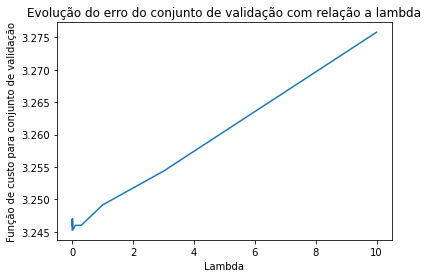

In [18]:
plt.plot(lambda_list, erro_list)
plt.ylabel('Função de custo para conjunto de validação')
plt.xlabel('Lambda')
plt.title('Evolução do erro do conjunto de validação com relação a lambda')
plt.show()

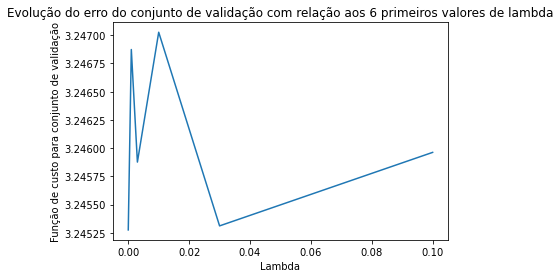

In [19]:
plt.plot(lambda_list[:6], erro_list[:6])
plt.ylabel('Função de custo para conjunto de validação')
plt.xlabel('Lambda')
plt.title('Evolução do erro do conjunto de validação com relação aos 6 primeiros valores de lambda')
plt.show()

<ipython-input-20-a95a2596d9a7>:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(lambda_list), np.log(erro_list))


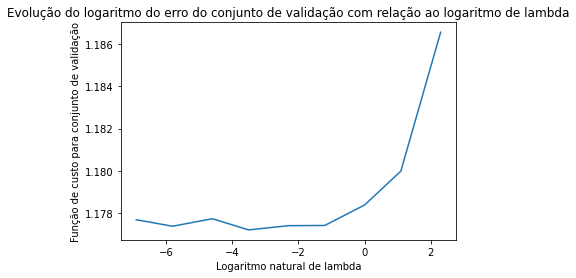

In [20]:
plt.plot(np.log(lambda_list), np.log(erro_list))
plt.ylabel('Função de custo para conjunto de validação')
plt.xlabel('Logaritmo natural de lambda')
plt.title('Evolução do logaritmo do erro do conjunto de validação com relação ao logaritmo de lambda')
plt.show()

In [21]:
print('O melhor valor para lambda é {}.'.format(lambda_list[np.argmin(erro_list)]))

O melhor valor para lambda é 0.


In [22]:
X_treino2 = np.append(X_treino, X_validacao, axis=0)
y_treino2 = np.append(y_treino, y_validacao, axis=0)
input_layer_size = X_treino2.shape[1]
hidden_layer_size = np.array([25])
num_labels = len(np.unique(y_treino2))
Lambda = lambda_list[np.argmin(erro_list)]
alpha = 0.8
nbr_iter = 800
conj = False
theta_treino2 = backpropagation(X_treino2, y_treino2, num_labels, hidden_layer_size, Lambda, alpha, nbr_iter, regularizada=True)[0]

custo_teste = computeCost(theta_treino2, X_teste, y_teste, input_layer_size, hidden_layer_size, num_labels, Lambda, conj, regularizada=True)[0]
pred_teste = prediction(X_teste, theta_treino2)
print('O valor da função de custo com lambda ótimo para o conjunto de teste é {:.4f}.\nO algoritmo classificou corretamente {:.2f}% das imagens do conjunto de teste.'.format(custo_teste, (np.sum(pred_teste == y_teste)/len(y_teste)*100)))

O valor da função de custo com lambda ótimo para o conjunto de teste é 0.5303.
O algoritmo classificou corretamente 91.80% das imagens do conjunto de teste.
